In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]
X_features = ["size in sqft", "no of rooms", "no of floors", "age"]

In [4]:
print(X_train , y_train)

[[1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.314e+03 2.000e+00 1.000e+00 1.400e+01]
 [8.640e+02 2.000e+00 1.000e+00 6.600e+01]
 [1.836e+03 3.000e+00 1.000e+00 1.700e+01]
 [1.026e+03 3.000e+00 1.000e+00 4.300e+01]
 [3.194e+03 4.000e+00 2.000e+00 8.700e+01]
 [7.880e+02 2.000e+00 1.000e+00 8.000e+01]
 [1.200e+03 2.000e+00 2.000e+00 1.700e+01]
 [1.557e+03 2.000e+00 1.000e+00 1.800e+01]
 [1.430e+03 3.000e+00 1.000e+00 2.000e+01]
 [1.220e+03 2.000e+00 1.000e+00 1.500e+01]
 [1.092e+03 2.000e+00 1.000e+00 6.400e+01]
 [8.480e+02 1.000e+00 1.000e+00 1.700e+01]
 [1.682e+03 3.000e+00 2.000e+00 2.300e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.040e+03 3.000e+00 1.000e+00 4.400e+01]
 [1.652e+03 2.000e+00 1.000e+00 2.100e+01]
 [1.088e+03 2.000e+00 1.000e+00 3.500e+01]
 [1.316e+03 3.000e+00 1.000e+00 1.400e+01]
 [1.593e+03 0.000e+00 1.000e+00 2.000e+01]
 [9.720e+02

# noramlize data for better result using z normalization

In [5]:
def normalizeZ(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    norm = (X - mean)/std
    
    return norm, mean, std

In [6]:
norm_X, mean, std = normalizeZ(X_train)
print(norm_X)

[[-4.23632450e-01  4.33808841e-01 -7.89272336e-01  9.93726440e-01]
 [ 1.28427160e+00  4.33808841e-01  1.26698980e+00 -8.29542143e-01]
 [ 7.44933479e-01  4.33808841e-01  1.26698980e+00  1.40281572e-01]
 [ 1.31342501e+00  4.33808841e-01  1.26698980e+00 -9.07128040e-01]
 [-2.53570880e-01 -1.10001528e+00 -7.89272336e-01 -9.45920989e-01]
 [-1.34682383e+00 -1.10001528e+00 -7.89272336e-01  1.07131234e+00]
 [ 1.01460254e+00  4.33808841e-01 -7.89272336e-01 -8.29542143e-01]
 [-9.53252767e-01  4.33808841e-01 -7.89272336e-01  1.79074520e-01]
 [ 4.31379699e+00  1.96763296e+00  1.26698980e+00  1.88596426e+00]
 [-1.53146210e+00 -1.10001528e+00 -7.89272336e-01  1.61441362e+00]
 [-5.30528294e-01 -1.10001528e+00  1.26698980e+00 -8.29542143e-01]
 [ 3.36785712e-01 -1.10001528e+00 -7.89272336e-01 -7.90749194e-01]
 [ 2.82454353e-02  4.33808841e-01 -7.89272336e-01 -7.13163297e-01]
 [-4.81939274e-01 -1.10001528e+00 -7.89272336e-01 -9.07128040e-01]
 [-7.92909002e-01 -1.10001528e+00 -7.89272336e-01  9.93726440e

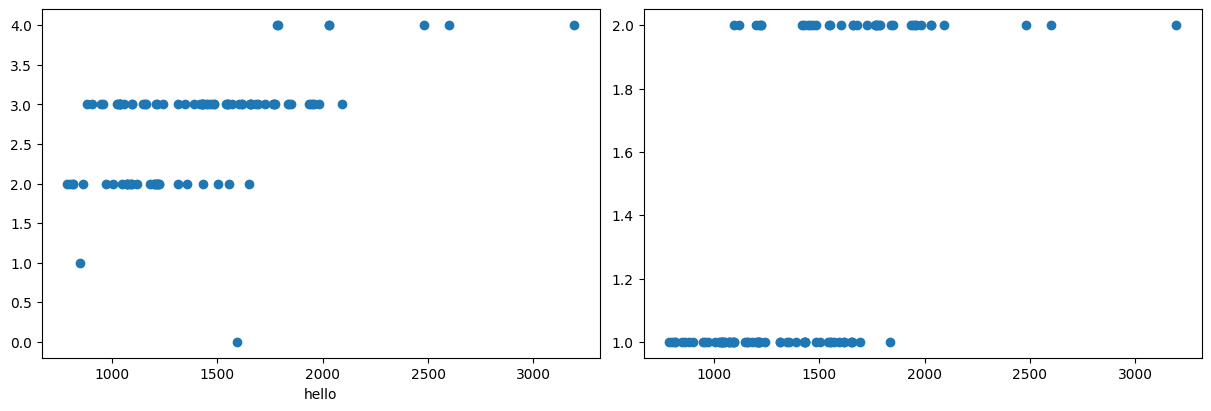

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4),constrained_layout=True)
ax[0].scatter(X_train[:,0], X_train[:,1])
ax[0].set_xlabel('hello')
ax[1].scatter(X_train[:,0], X_train[:,2])


Text(0, 0.5, 'cost')

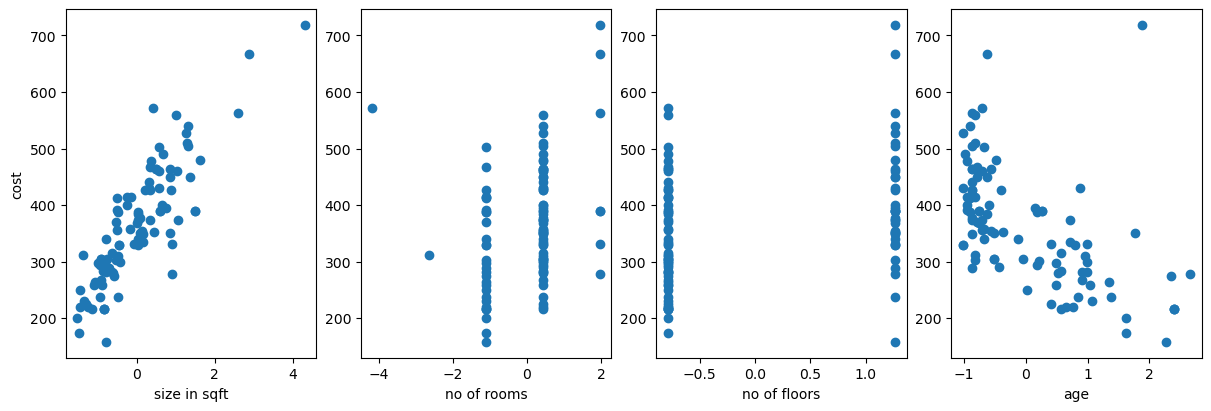

In [7]:
fig, ax = plt.subplots(1,4, figsize=(12,4),constrained_layout=True)
for i in range(len(ax)):
    ax[i].scatter(norm_X[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('cost')

In [97]:
def compute_cost(x,y,w,b):
    m = x.shape[0];
    total_cost = 0;
    for i in range(m):
        f_wb = np.dot(w,x[i,:]) + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost/(2 * m)
    return total_cost

In [99]:
cost = compute_cost(norm_X, y_train, [0.1, 100, 25,24], 10)
print(cost)

71752.2349111235


In [124]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i, :], w) + b
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i,j]
        dj_db += f_wb - y[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [125]:
w, b = compute_gradient(norm_X, y_train, [0,0,0,0],0)
print(w,b)

[-89.1428163  -29.51824777 -32.82290635  59.60844113] -363.1560808080808


In [136]:
def gradient_descent(X,y,iteration, alpha, w_init, b_init):
    w = w_init
    b = b_init
    j_history = []
    
    for i in range(iteration):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - alpha *dj_dw
        b = b - alpha *dj_db
        
        if (i < 100000):
            cost = compute_cost(X,y,w,b)
            j_history.append(cost)
        
        if (i % math.ceil(iteration / 10) == 0):
            print(f"cost: {cost:4.2f}, w: {w}, b: {b:6.4f}")
    return w,b,j_history

In [139]:
w,b,j = gradient_descent(norm_X, y_train, 1000, 0.1, [0,0,0,0], 0)

cost: 57617.03, w: [ 8.91428163  2.95182478  3.28229064 -5.96084411], b: 36.3156
cost: 221.09, w: [107.91666103 -19.95469161 -31.20467374 -38.47753825], b: 363.1474
cost: 219.21, w: [110.47249001 -21.22280317 -32.65803886 -37.9873815 ], b: 363.1561
cost: 219.21, w: [110.55747512 -21.26567509 -32.70554941 -37.9707323 ], b: 363.1561
cost: 219.21, w: [110.56030041 -21.26710189 -32.70712714 -37.97017815], b: 363.1561
cost: 219.21, w: [110.56039433 -21.26714933 -32.70717959 -37.97015972], b: 363.1561
cost: 219.21, w: [110.56039745 -21.2671509  -32.70718133 -37.97015911], b: 363.1561
cost: 219.21, w: [110.56039756 -21.26715096 -32.70718139 -37.97015909], b: 363.1561
cost: 219.21, w: [110.56039756 -21.26715096 -32.70718139 -37.97015909], b: 363.1561
cost: 219.21, w: [110.56039756 -21.26715096 -32.70718139 -37.97015909], b: 363.1561


In [140]:
m = norm_X.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(norm_X[i], w) + b

Text(0, 0.5, 'cost')

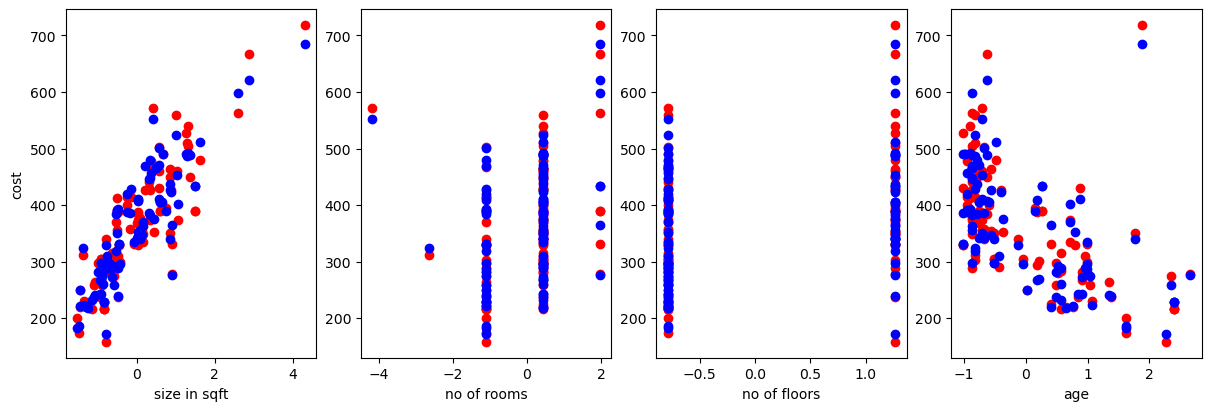

In [141]:
fig, ax = plt.subplots(1,4, figsize=(12,4),constrained_layout=True)
for i in range(len(ax)):
    ax[i].scatter(norm_X[:,i], y_train, c='red')
    ax[i].scatter(norm_X[:,i],yp , c='blue')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('cost')